# Importing Data


In [ ]:
import pandas as pd
activity_played_url = 'https://raw.githubusercontent.com/Gaurang-1402/nyu-2022-datathon/main/activity_played.csv'
activity_df = pd.read_csv(activity_played_url)

In [ ]:
player_stats_url = 'https://raw.githubusercontent.com/Gaurang-1402/nyu-2022-datathon/main/gen_player_stats.csv'
gen_df = pd.read_csv(player_stats_url)

In [ ]:
item_spend_url = 'https://raw.githubusercontent.com/Gaurang-1402/nyu-2022-datathon/main/item_spend.csv'
item_df = pd.read_csv(item_spend_url)

# Time Spent Analysis

Here, we separate 21 days into 3 time periods: 7 days before the event, 7 days during the event, and 7 days after the event.

For each day, we analyze the time spent by players and compare the averages between the three time periods.

In [ ]:
activity_df['occur_date'] = pd.to_datetime(activity_df['occur_date'])
before_halloween = activity_df.loc[activity_df['occur_date'] < '2020-10-29']
before_halloween = before_halloween.loc[before_halloween['occur_date'] > '2020-10-21']

In [ ]:
beforearr = []
days = before_halloween['occur_date'].unique()
days.sort()
for i in days:
  day = before_halloween[before_halloween['occur_date'] == i]
  beforearr.append(day['time_spent'].sum())

In [ ]:
np.sum(beforearr)

126118.75520118512

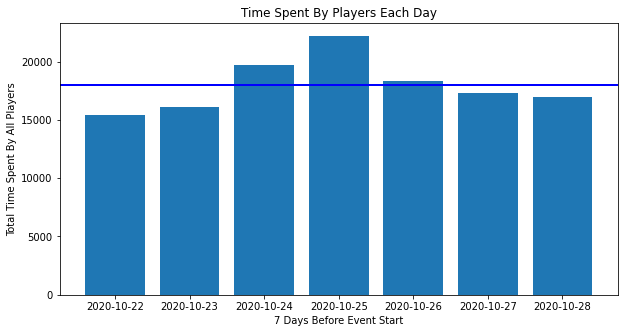

In [ ]:
#bar plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar(days, beforearr)
plt.axhline(np.mean(beforearr), color='blue', linewidth=2)
plt.xlabel("7 Days Before Event Start")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
during_halloween = activity_df.loc[activity_df['occur_date'] > '2020-10-28']
during_halloween = during_halloween.loc[during_halloween['occur_date'] < '2020-11-05']

In [ ]:
duringarr = []
duringdays = during_halloween['occur_date'].unique()
duringdays.sort()
for i in duringdays:
  day = during_halloween[during_halloween['occur_date'] == i]
  duringarr.append(day['time_spent'].sum())

In [ ]:
np.sum(duringarr)

130193.27750557032

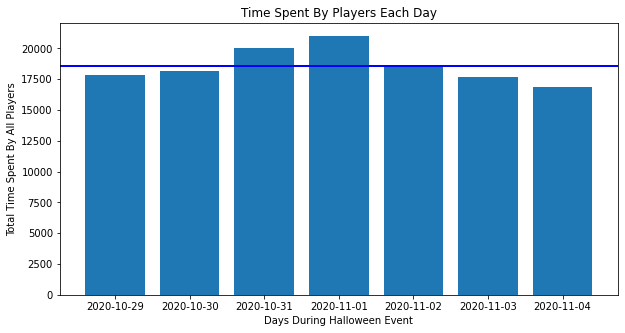

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(duringdays, duringarr)
plt.axhline(np.mean(duringarr), color='blue', linewidth=2)
plt.xlabel("Days During Halloween Event")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
after_halloween = activity_df.loc[activity_df['occur_date'] > '2020-11-04']
after_halloween = after_halloween.loc[after_halloween['occur_date'] < '2020-11-12']

In [ ]:
afterarr = []
afterdays = after_halloween['occur_date'].unique()
afterdays.sort()
for i in afterdays:
  day = after_halloween[after_halloween['occur_date'] == i]
  afterarr.append(day['time_spent'].sum())

In [ ]:
np.sum(afterarr)

160134.9892541363

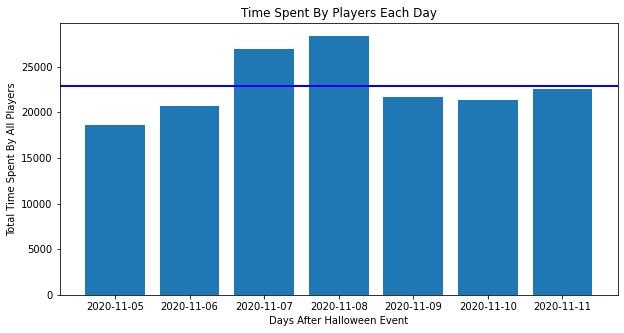

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(afterdays, afterarr)
plt.axhline(np.mean(afterarr), color='blue', linewidth=2)
plt.xlabel("Days After Halloween Event")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
timeline = activity_df.loc[activity_df['occur_date'] < '2020-11-12']
timeline = timeline.loc[timeline['occur_date'] > '2020-10-21']

In [ ]:
timearr = []
timedays = timeline['occur_date'].unique()
timedays.sort()
for i in timedays:
  day = timeline[timeline['occur_date'] == i]
  timearr.append(day['time_spent'].sum())

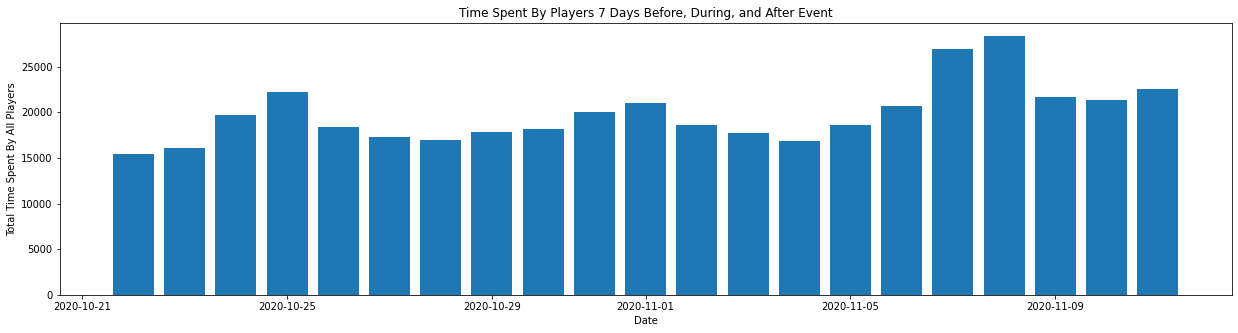

In [ ]:
fig = plt.figure(figsize = (21, 5))
plt.bar(timedays, timearr)
plt.xlabel("Date")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players 7 Days Before, During, and After Event")
plt.show()

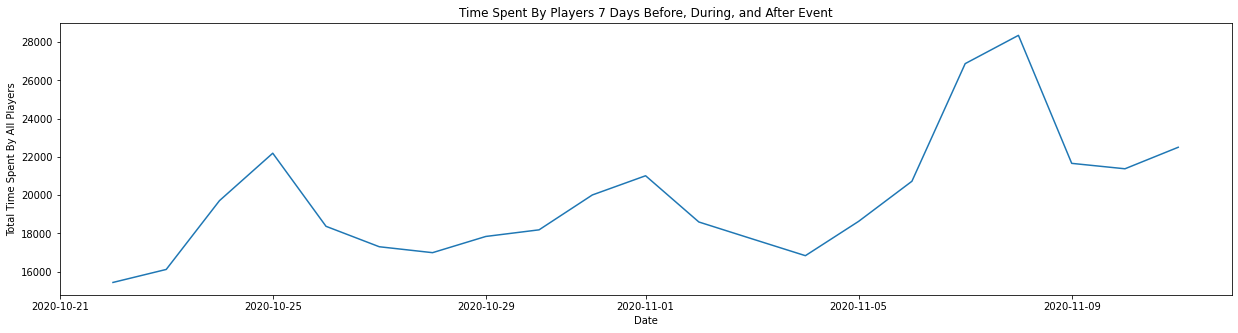

In [ ]:
fig = plt.figure(figsize = (21, 5))
plt.plot(timedays, timearr)
plt.title('Time Spent By Players 7 Days Before, During, and After Event')
plt.xlabel('Date')
plt.ylabel('Total Time Spent By All Players')
plt.show()

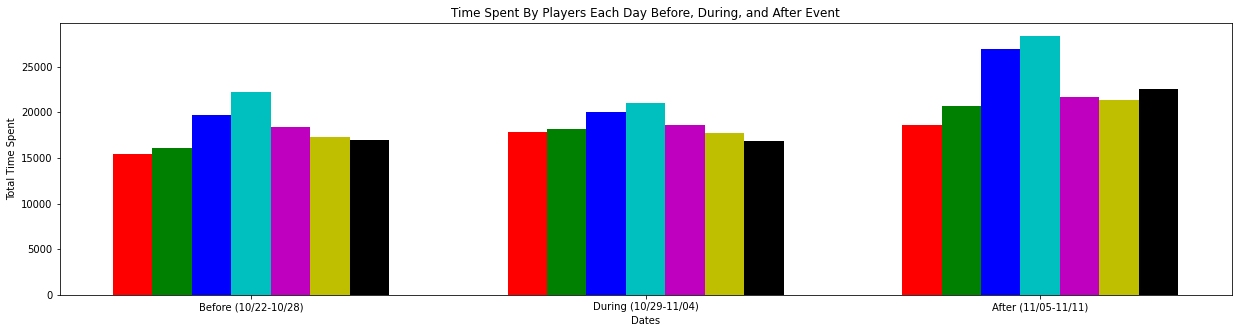

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.1
plt.figure(figsize = (21, 5))
day1 = [beforearr[0], duringarr[0], afterarr[0]]
day2 = [beforearr[1], duringarr[1], afterarr[1]]
day3 = [beforearr[2], duringarr[2], afterarr[2]]
day4 = [beforearr[3], duringarr[3], afterarr[3]]
day5 = [beforearr[4], duringarr[4], afterarr[4]]
day6 = [beforearr[5], duringarr[5], afterarr[5]]
day7 = [beforearr[6], duringarr[6], afterarr[6]]


xvals = day1
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = day2
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = day3
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = day4
bar4 = plt.bar(ind+width*3, avals, width, color = 'c')

bvals = day5
bar5 = plt.bar(ind+width*4, bvals, width, color = 'm')

cvals = day6
bar6 = plt.bar(ind+width*5, cvals, width, color = 'y')

dvals = day7
bar7 = plt.bar(ind+width*6, dvals, width, color = 'k')
  
plt.xlabel("Dates")
plt.ylabel('Total Time Spent')
plt.title("Time Spent By Players Each Day Before, During, and After Event")
  
plt.xticks(ind+width*3,['Before (10/22-10/28)', 'During (10/29-11/04)', 'After (11/05-11/11)'])
plt.show()

In [ ]:
print("Median time spent by all players each day before the event:", np.median(beforearr))
print("Median time spent by all players each day during the event:", np.median(duringarr))
print("Median time spent by all players each day after the event:", np.median(afterarr))

Median time spent by all players each day before the event: 17301.640076440242
Median time spent by all players each day during the event: 18186.115500949905
Median time spent by all players each day after the event: 21662.24200313483


In [ ]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(beforearr, duringarr)
results

MannwhitneyuResult(statistic=18.0, pvalue=0.22164426105822005)

In [ ]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(beforearr, afterarr)
results

MannwhitneyuResult(statistic=5.0, pvalue=0.0075968049887301095)

In [ ]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(duringarr, afterarr)
results

MannwhitneyuResult(statistic=3.0, pvalue=0.003645179045767819)

In [ ]:
print("Average time spent by all players each day before the event:", np.mean(beforearr))
print("Average time spent by all players each day during the event:", np.mean(duringarr))
print("Average time spent by all players each day after the event:", np.mean(afterarr))

Average time spent by all players each day before the event: 18016.96502874073
Average time spent by all players each day during the event: 18599.039643652904
Average time spent by all players each day after the event: 22876.427036305187


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(beforearr, duringarr, value=0) 

(-0.5638749177575101, 0.5728392611104829)

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(beforearr, afterarr, value=0) 

(-3.075969033555295, 0.002098196349211982)

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(duringarr, afterarr, value=0) 

(-3.006574026200122, 0.002642097147240029)

In [ ]:
before_heist = activity_df.loc[activity_df['occur_date'] < '2020-11-12']
before_heist = before_heist.loc[before_heist['occur_date'] > '2020-11-04']

In [ ]:
befheistarr = []
befheistdays = before_heist['occur_date'].unique()
befheistdays.sort()
for i in befheistdays:
  day = before_heist[before_heist['occur_date'] == i]
  befheistarr.append(day['time_spent'].sum())

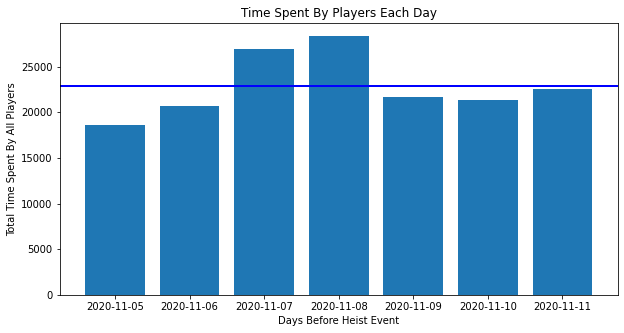

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(befheistdays, befheistarr)
plt.axhline(np.mean(befheistarr), color='blue', linewidth=2)
plt.xlabel("Days Before Heist Event")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
during_heist = activity_df.loc[activity_df['occur_date'] < '2020-11-19']
during_heist = during_heist.loc[during_heist['occur_date'] > '2020-11-11']

In [ ]:
durheistarr = []
durheistdays = during_heist['occur_date'].unique()
durheistdays.sort()
for i in durheistdays:
  day = during_heist[during_heist['occur_date'] == i]
  durheistarr.append(day['time_spent'].sum())

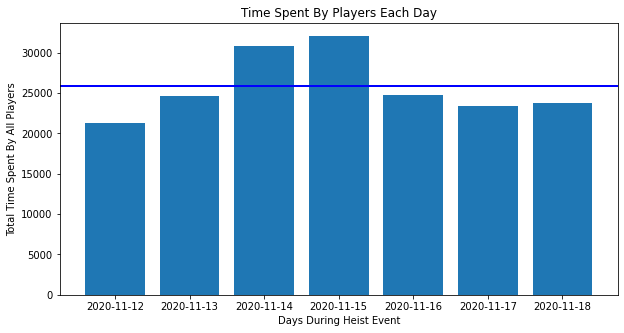

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(durheistdays, durheistarr)
plt.axhline(np.mean(durheistarr), color='blue', linewidth=2)
plt.xlabel("Days During Heist Event")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
after_heist = activity_df.loc[activity_df['occur_date'] < '2020-11-26']
after_heist = after_heist.loc[after_heist['occur_date'] > '2020-11-18']

In [ ]:
afterheistarr = []
afterheistdays = after_heist['occur_date'].unique()
afterheistdays.sort()
for i in afterheistdays:
  day = after_heist[after_heist['occur_date'] == i]
  afterheistarr.append(day['time_spent'].sum())

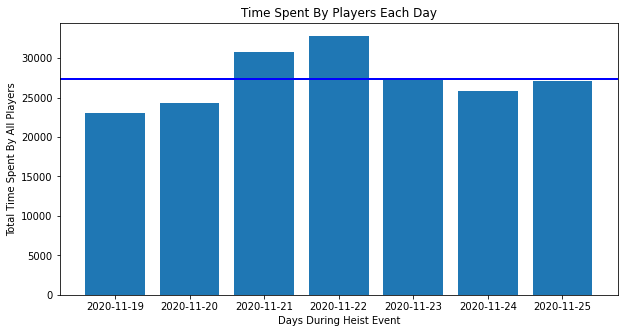

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(afterheistdays, afterheistarr)
plt.axhline(np.mean(afterheistarr), color='blue', linewidth=2)
plt.xlabel("Days During Heist Event")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
heist = activity_df.loc[activity_df['occur_date'] < '2020-11-26']
heist = heist.loc[heist['occur_date'] > '2020-11-04']

In [ ]:
heistarr = []
heistdays = heist['occur_date'].unique()
heistdays.sort()
for i in heistdays:
  day = heist[heist['occur_date'] == i]
  heistarr.append(day['time_spent'].sum())

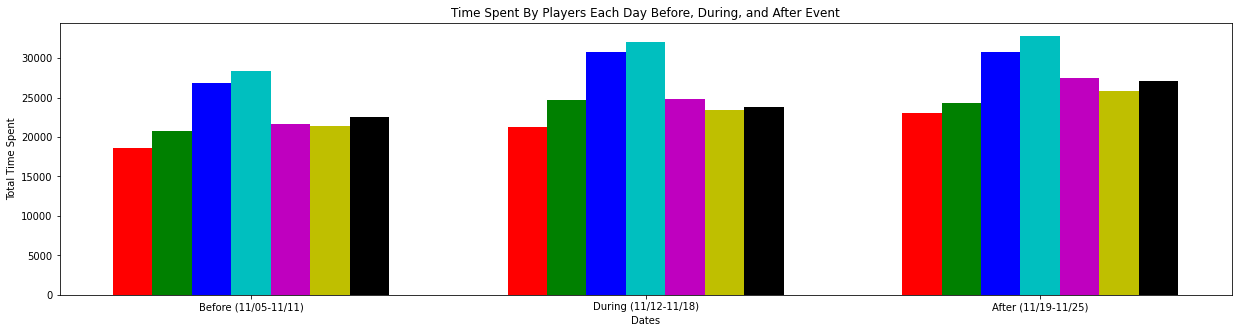

In [ ]:
heist = activity_df.loc[activity_df['occur_date'] < '2020-11-26']
heist = heist.loc[heist['occur_date'] > '2020-11-04']
heistarr = []
heistdays = heist['occur_date'].unique()
heistdays.sort()
for i in heistdays:
  day = heist[heist['occur_date'] == i]
  heistarr.append(day['time_spent'].sum())

N = 3
ind = np.arange(N) 
width = 0.1
plt.figure(figsize = (21, 5))
day1 = [heistarr[0], heistarr[7], heistarr[14]]
day2 = [heistarr[1], heistarr[8], heistarr[15]]
day3 = [heistarr[2], heistarr[9], heistarr[16]]
day4 = [heistarr[3], heistarr[10], heistarr[17]]
day5 = [heistarr[4], heistarr[11], heistarr[18]]
day6 = [heistarr[5], heistarr[12], heistarr[19]]
day7 = [heistarr[6], heistarr[13], heistarr[20]]

xvals = day1
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = day2
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = day3
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = day4
bar4 = plt.bar(ind+width*3, avals, width, color = 'c')

bvals = day5
bar5 = plt.bar(ind+width*4, bvals, width, color = 'm')

cvals = day6
bar6 = plt.bar(ind+width*5, cvals, width, color = 'y')

dvals = day7
bar7 = plt.bar(ind+width*6, dvals, width, color = 'k')
  
plt.xlabel("Dates")
plt.ylabel('Total Time Spent')
plt.title("Time Spent By Players Each Day Before, During, and After Event")
  
plt.xticks(ind+width*3,['Before (11/05-11/11)', 'During (11/12-11/18)', 'After (11/19-11/25)'])
plt.show()

In [ ]:
print(np.sum(befheistarr), np.sum(durheistarr), np.sum(afterheistarr))

160134.9892541363 180765.43610206994 191207.41929050643


In [ ]:
ztest(befheistarr, durheistarr, value=0) 

(-1.4657160370375657, 0.14272566331907405)

In [ ]:
ztest(befheistarr, afterheistarr, value=0) 

(-2.388711737950869, 0.016907562500980994)

In [ ]:
ztest(durheistarr, afterheistarr, value=0) 

(-0.7419550251881216, 0.45811458538524663)

# Money Spent Analysis


In [ ]:
from pandas.compat.numpy.function import SUM_DEFAULTS
import pandas as pd
item_subs = ['MUSCLE', 'SPORTS', 'SEDAN', 'OFF ROAD', 'SUPER', 'OFF_ROAD',
       'SPORT', 'COMMERCIAL', 'MOTORCYCLE', 'SUV', 'SPORTS CLASSIC',
       'HELICOPTER', 'PLANE', 'CYCLE', 'MILITARY', 'SPORT CLASSIC', 'VAN',
       'UTILITY', 'SPORT_CLASSIC', 'COUPE', 'COMPACT', 'BOAT',
       'OPEN_WHEEL', 'COMPACTS', 'INDUSTRIAL', 'OFF-ROAD', 'EMERGENCY',
       'FACILITY', 'ARCADE', 'WAREHOUSE TECHNICIAN', 'HANGAR',
       'MOBILE OPERATION CENTER', 'BUSINESS - METH', 'HIGH END',
       'BUSINESS - FORGERY', 'CASINO PENTHOUSE', 'VEHICLE WAREHOUSE',
       'NIGHTCLUB', 'OFFICE', 'NIGHTCLUB WAREHOUSE', 'YACHT',
       'BUSINESS - CASH', 'CLUBHOUSE', 'CONTRABAND WAREHOUSE',
       'GUNRUNNING BUNKER', 'BUSINESS - COKE', 'BUSINESS - WEED',
       'PROJECTILES', 'HAND GUNS', 'MELEE', 'ASSAULT RIFLES',
       'MACHINE GUNS', 'SNIPER RIFLES', 'HEAVY WEAPON', 'SHOTGUNS',
       'SERVICE', 'BOATS', 'VANS']

types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
before = ["2020-10-22","2020-10-23","2020-10-24","2020-10-25","2020-10-26","2020-10-27","2020-10-28"]
during = ["2020-10-29","2020-10-30","2020-10-31","2020-11-01","2020-11-02","2020-11-03","2020-11-04"]
after =  ["2020-11-05","2020-11-06","2020-11-07","2020-11-08","2020-11-09","2020-11-10","2020-11-11"]

def get_data_sub(occur_date, sub):
  item_df['occur_date'] = pd.to_datetime(item_df['occur_date'])
  week = item_df.loc[item_df['occur_date'] == occur_date]
  final = []
  for i in range(len(sub)):
    final.append(len(week[week["item_sub_type"] == sub[i]]))
  return final

def get_data_type(occur_date, types):
  item_df['occur_date'] = pd.to_datetime(item_df['occur_date'])
  week = item_df.loc[item_df['occur_date'] == occur_date]
  final = []
  for i in range(len(types)):
    final.append(len(week[week["item_type"] == types[i]]))
  return final
def money_spend_per_day(occur_date):
  item_df['occur_date'] = pd.to_datetime(item_df['occur_date'])
  week = item_df.loc[item_df['occur_date'] == occur_date]
  sum = 0
  for i in range(len(week)):
    sum += float(week.iloc[i][6])
  return sum

sub_dat = get_data_sub("2020-10-29", item_subs)
type_num = get_data_type("2020-10-29", types)
cash = []
for i in range(len(before)):
  cash.append(money_spend_per_day(before[i]))
cash1 = []
for i in range(len(during)):
  cash1.append(money_spend_per_day(during[i]))
cash2 = []
for i in range(len(after)):
  cash2.append(money_spend_per_day(after[i]))



stuff = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(before)):
  dd = get_data_type(before[i], types)
  for j in range(len(dd)):
    stuff[j] += dd[j]
print(stuff)
i = 0
w = 0
while i < len(stuff):
  print(i)
  if stuff[i] < 750:
    w += stuff.pop(i)
    types.pop(i)
  else:
    i += 1
stuff.append(w)
types.append("OTHER")
print(stuff)

# stuff1 = []
# stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
# for i in range(len(during)):
#   dd = get_data_type(during[i], types)
#   for j in range(len(dd)):
#     stuff1[j] += dd[j]
# print(stuff1)
# stuff2 = [0,0,0,0,0,0,0,0,0,0,0,0]
# for i in range(len(after)):
#   dd = get_data_type(after[i], types)
#   for j in range(len(dd)):
#     stuff2[j] += dd[j]

[4251, 98, 1046, 274, 155, 194, 43, 14, 24, 1374, 4167, 4]
0
1
1
2
2
2
2
2
2
2
3
4
[4251, 1046, 1374, 4167, 806]


In [ ]:
money_spent_before = cash
money_spent_during = cash1
money_spent_after = cash2

In [ ]:
ztest(money_spent_before,money_spent_during, value=0)

(1.1875108684588416, 0.23502617215018007)

In [ ]:
ztest(money_spent_before,money_spent_after, value=0)

(-2.2437464705090067, 0.02484871830699456)

In [ ]:
ztest(money_spent_during,money_spent_after, value=0)

(-2.7726674129310473, 0.00555989125403778)

<BarContainer object of 58 artists>

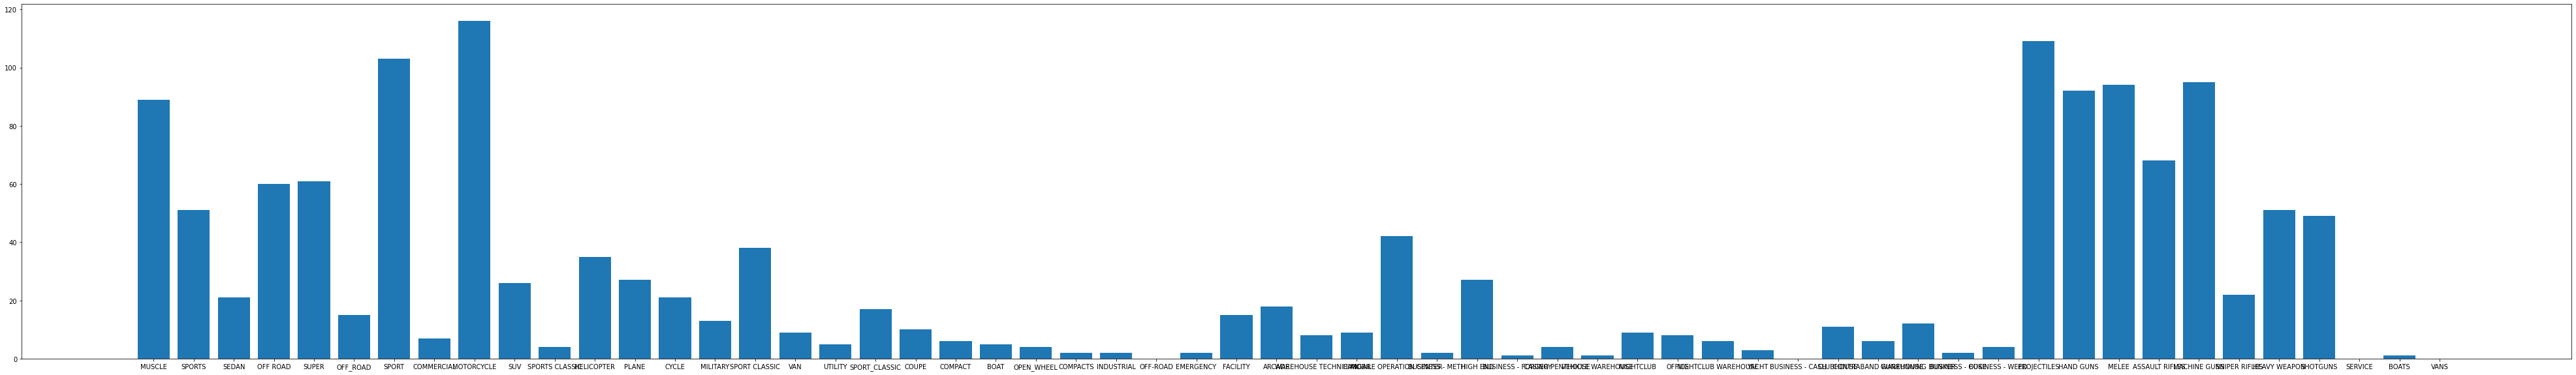

In [ ]:
ddsa = plt.figure(figsize = (70, 10))
plt.bar(item_subs, sub_dat)


Text(0.5, 1.0, 'Before money')

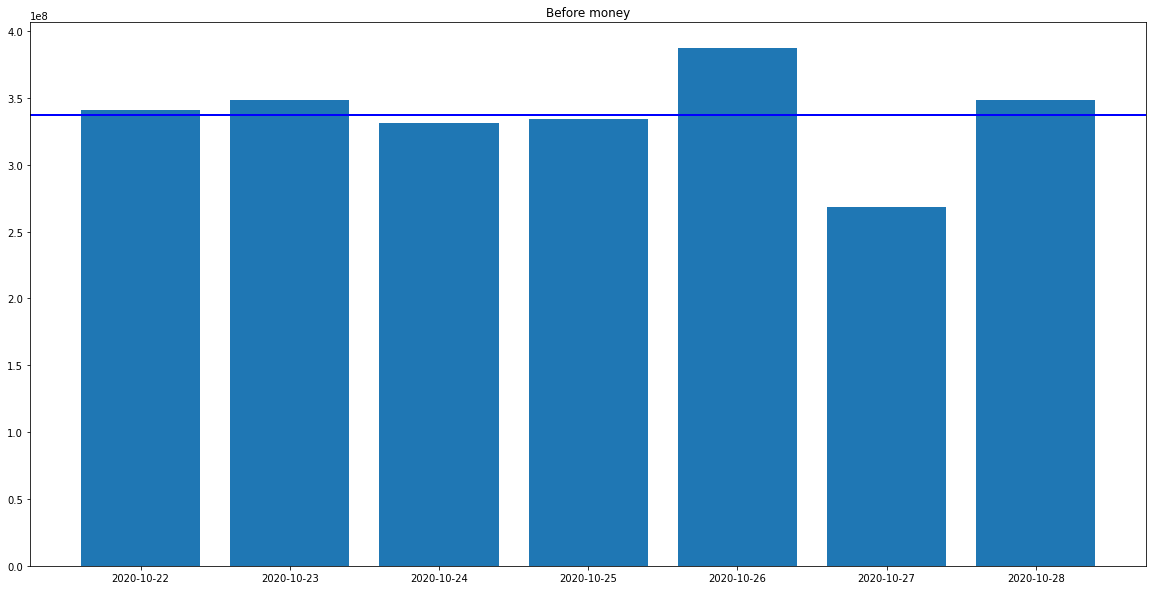

In [ ]:
ddsa = plt.figure(figsize = (20, 10))
plt.bar(before, cash)
plt.axhline(np.mean(cash), color='blue', linewidth=2)

plt.title("Before money")



Text(0.5, 1.0, 'during money')

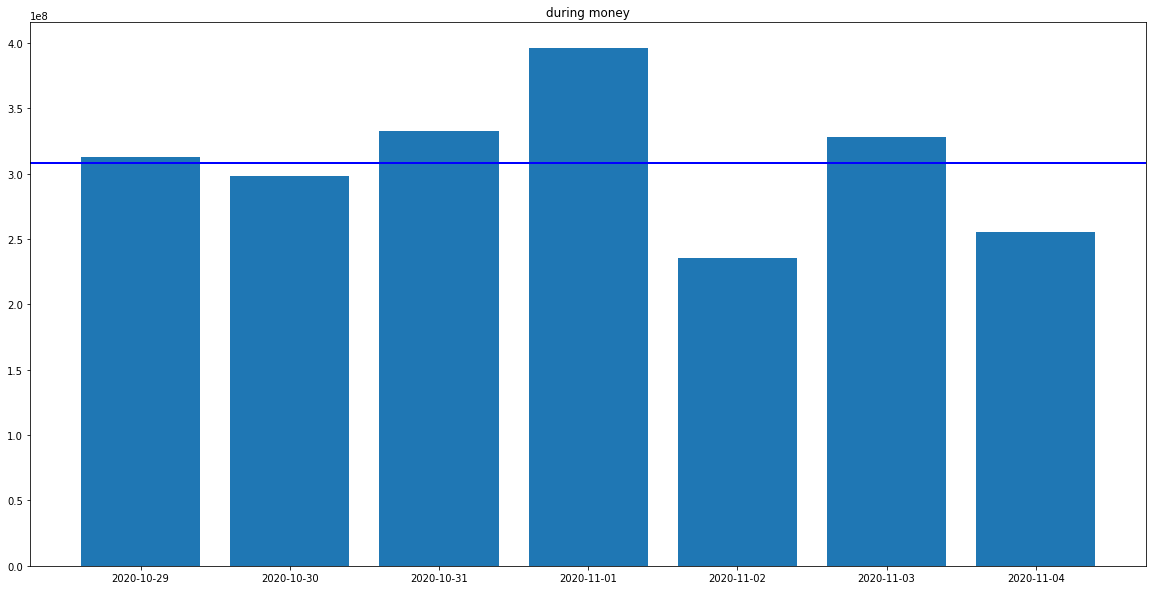

In [ ]:
ddsa = plt.figure(figsize = (20, 10))
plt.bar(during, cash1)
plt.axhline(np.mean(cash1), color='blue', linewidth=2)

plt.title("during money")

Text(0.5, 1.0, 'after money')

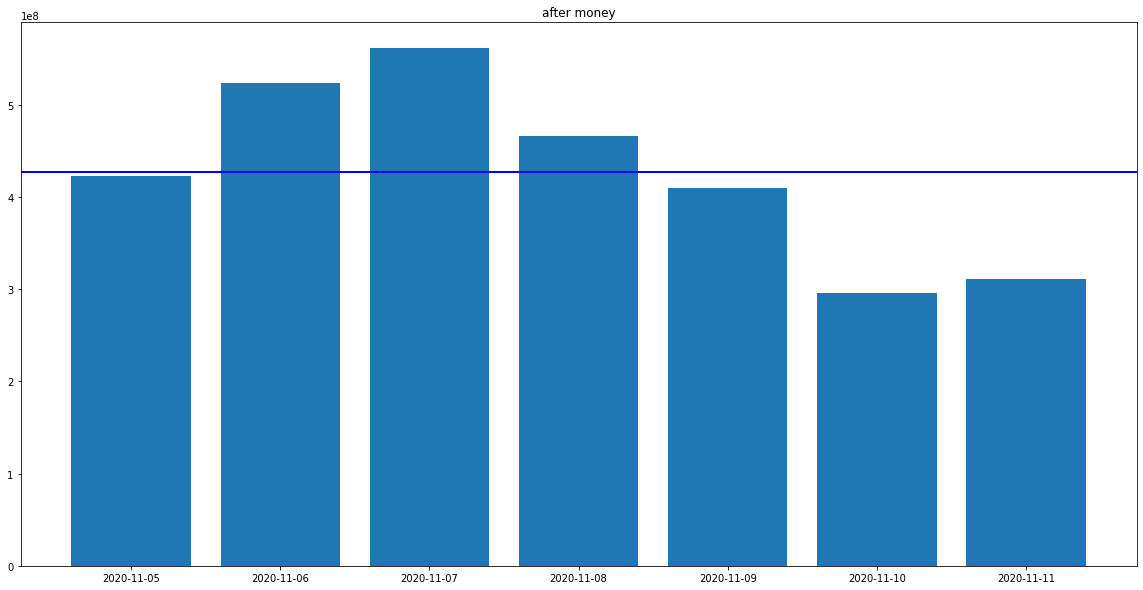

In [ ]:
import numpy as np
ddsa = plt.figure(figsize = (20, 10))
plt.bar(after, cash2)
plt.axhline(np.mean(cash2), color='blue', linewidth=2)
plt.title("after money")

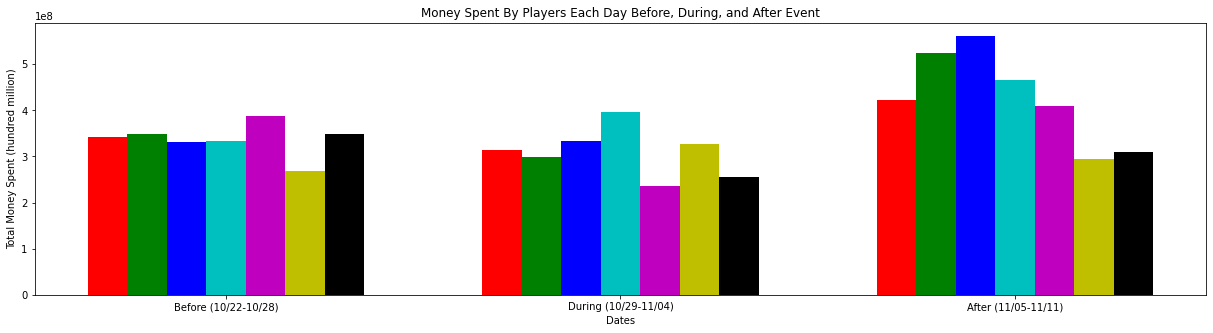

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.1
plt.figure(figsize = (21, 5))
day1 = [cash[0], cash1[0], cash2[0]]
day2 = [cash[1], cash1[1], cash2[1]]
day3 = [cash[2], cash1[2], cash2[2]]
day4 = [cash[3], cash1[3], cash2[3]]
day5 = [cash[4], cash1[4], cash2[4]]
day6 = [cash[5], cash1[5], cash2[5]]
day7 = [cash[6], cash1[6], cash2[6]]


xvals = day1
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = day2
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = day3
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = day4
bar4 = plt.bar(ind+width*3, avals, width, color = 'c')

bvals = day5
bar5 = plt.bar(ind+width*4, bvals, width, color = 'm')

cvals = day6
bar6 = plt.bar(ind+width*5, cvals, width, color = 'y')

dvals = day7
bar7 = plt.bar(ind+width*6, dvals, width, color = 'k')
  
plt.xlabel("Dates")
plt.ylabel('Total Money Spent (hundred million)')
plt.title("Money Spent By Players Each Day Before, During, and After Event")
  
plt.xticks(ind+width*3,['Before (10/22-10/28)', 'During (10/29-11/04)', 'After (11/05-11/11)'])
plt.show()

In [ ]:
print(np.sum(cash), np.sum(cash1), np.sum(cash2))

2358891763.825822 2158321865.573157 2988925496.3833485


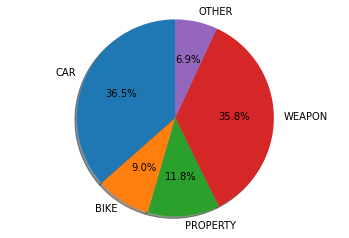

In [ ]:
labels = types
sizes = stuff
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

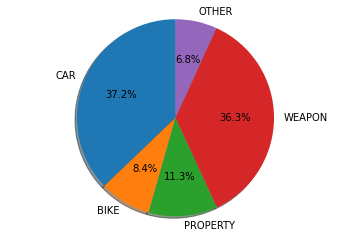

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(during)):
  dd = get_data_type(during[i], types)
  for j in range(len(dd)):
    stuff1[j] += dd[j]
i = 0
w = 0
while i < len(stuff1):
  if stuff1[i] < 750:
    w += stuff1.pop(i)
    types.pop(i)
  else:
    i += 1
stuff1.append(w)
types.append("OTHER")
labels = types
sizes = stuff1
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

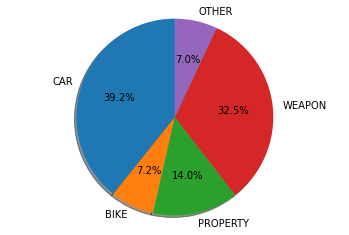

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff2 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(after)):
  dd = get_data_type(after[i], types)
  for j in range(len(dd)):
    stuff2[j] += dd[j]
i = 0
w = 0
while i < len(stuff2):
  if stuff2[i] < 750:
    w += stuff2.pop(i)
    types.pop(i)
  else:
    i += 1
stuff2.append(w)
types.append("OTHER")
labels = types
sizes = stuff2
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
hcash = []
for i in range(len(befheistdays)):
  hcash.append(money_spend_per_day(befheistdays[i]))
hcash1 = []
for i in range(len(durheistarr)):
  hcash1.append(money_spend_per_day(durheistdays[i]))
hcash2 = []
for i in range(len(afterheistdays)):
  hcash2.append(money_spend_per_day(afterheistdays[i]))

In [ ]:
money_spent_before_heist = hcash
money_spent_during_heist = hcash1
money_spent_after_heist = hcash2

In [ ]:
ztest(money_spent_before_heist, money_spent_during_heist)

(0.9531970456761393, 0.3404902429915607)

In [ ]:
ztest(money_spent_before_heist, money_spent_after_heist)

(-0.418966420879128, 0.6752406732159177)

In [ ]:
ztest(money_spent_during_heist, money_spent_after_heist)

(-1.6946007025822878, 0.0901511937110463)

In [ ]:
print(np.sum(hcash),np.sum(hcash1), np.sum(hcash2))

2988925496.3833485 2714450189.46881 3132921409.7994


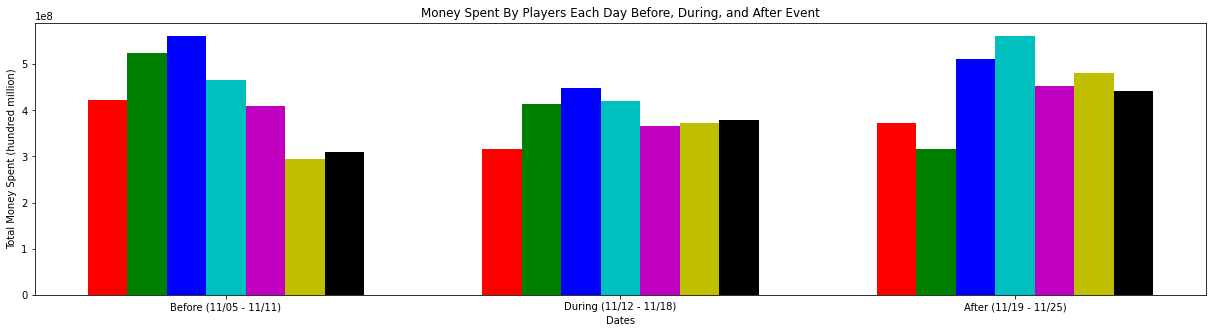

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.1
plt.figure(figsize = (21, 5))
day1 = [hcash[0], hcash1[0], hcash2[0]]
day2 = [hcash[1], hcash1[1], hcash2[1]]
day3 = [hcash[2], hcash1[2], hcash2[2]]
day4 = [hcash[3], hcash1[3], hcash2[3]]
day5 = [hcash[4], hcash1[4], hcash2[4]]
day6 = [hcash[5], hcash1[5], hcash2[5]]
day7 = [hcash[6], hcash1[6], hcash2[6]]


xvals = day1
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = day2
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = day3
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = day4
bar4 = plt.bar(ind+width*3, avals, width, color = 'c')

bvals = day5
bar5 = plt.bar(ind+width*4, bvals, width, color = 'm')

cvals = day6
bar6 = plt.bar(ind+width*5, cvals, width, color = 'y')

dvals = day7
bar7 = plt.bar(ind+width*6, dvals, width, color = 'k')
  
plt.xlabel("Dates")
plt.ylabel('Total Money Spent (hundred million)')
plt.title("Money Spent By Players Each Day Before, During, and After Event")
  
plt.xticks(ind+width*3,['Before (11/05 - 11/11)', 'During (11/12 - 11/18)', 'After (11/19 - 11/25)']) # need to update this!!!!
plt.show()

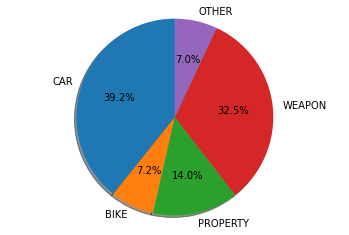

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(befheistdays)):
  dd = get_data_type(befheistdays[i], types)
  for j in range(len(dd)):
    stuff1[j] += dd[j]
i = 0
w = 0
while i < len(stuff1):
  if stuff1[i] < 750:
    w += stuff1.pop(i)
    types.pop(i)
  else:
    i += 1
stuff1.append(w)
types.append("OTHER")
labels = types
sizes = stuff1
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

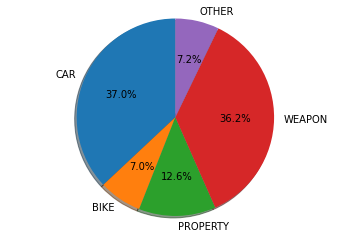

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(durheistdays)):
  dd = get_data_type(durheistdays[i], types)
  for j in range(len(dd)):
    stuff1[j] += dd[j]
i = 0
w = 0
while i < len(stuff1):
  if stuff1[i] < 750:
    w += stuff1.pop(i)
    types.pop(i)
  else:
    i += 1
stuff1.append(w)
types.append("OTHER")
labels = types
sizes = stuff1
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

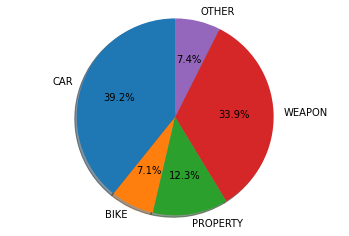

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(afterheistdays)):
  dd = get_data_type(afterheistdays[i], types)
  for j in range(len(dd)):
    stuff1[j] += dd[j]
i = 0
w = 0
while i < len(stuff1):
  if stuff1[i] < 750:
    w += stuff1.pop(i)
    types.pop(i)
  else:
    i += 1
stuff1.append(w)
types.append("OTHER")
labels = types
sizes = stuff1
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Platform Analysis

In [ ]:
pc_df = activity_df[activity_df['platform_id'] == 'PC']

In [ ]:
xbox_df = activity_df[activity_df['platform_id'] == 'XBOX']

In [ ]:
ps4_df = activity_df[activity_df['platform_id'] == 'PS4']

In [ ]:
pc_before_halloween = activity_df.loc[activity_df['occur_date'] < '2020-10-29']
pc_before_halloween = pc_before_halloween.loc[pc_before_halloween['occur_date'] > '2020-10-21']

In [ ]:
pc_before_average = pc_before_halloween['time_spent'].sum()/len(pc_before_halloween)

In [ ]:
pc_during_halloween = activity_df.loc[activity_df['occur_date'] > '2020-10-28']
pc_during_halloween = pc_during_halloween.loc[pc_during_halloween['occur_date'] < '2020-11-05']

In [ ]:
pc_during_average = pc_during_halloween['time_spent'].sum()/len(pc_during_halloween)

In [ ]:
pc_after_halloween = activity_df.loc[activity_df['occur_date'] > '2020-11-04']
pc_after_halloween = pc_after_halloween.loc[pc_after_halloween['occur_date'] < '2020-11-12']

In [ ]:
pc_after_average = pc_after_halloween['time_spent'].sum()/len(pc_after_halloween)

In [ ]:
pc_average = [pc_before_average, pc_during_average, pc_after_average]

In [ ]:
xbox_before_halloween = activity_df.loc[activity_df['occur_date'] < '2020-10-29']
xbox_before_halloween = xbox_before_halloween.loc[xbox_before_halloween['occur_date'] > '2020-10-21']

In [ ]:
xbox_before_average = xbox_before_halloween['time_spent'].sum()/len(xbox_before_halloween)

In [ ]:
xbox_during_halloween = activity_df.loc[activity_df['occur_date'] > '2020-10-28']
xbox_during_halloween = xbox_during_halloween.loc[xbox_during_halloween['occur_date'] < '2020-11-05']

In [ ]:
xbox_during_average = xbox_during_halloween['time_spent'].sum()/len(xbox_during_halloween)

In [ ]:
xbox_after_halloween = activity_df.loc[activity_df['occur_date'] > '2020-11-04']
xbox_after_halloween = xbox_after_halloween.loc[xbox_after_halloween['occur_date'] < '2020-11-12']

In [ ]:
xbox_after_average = xbox_after_halloween['time_spent'].sum()/len(xbox_after_halloween)

In [ ]:
ps4_before_halloween = activity_df.loc[activity_df['occur_date'] < '2020-10-29']
ps4_before_halloween = ps4_before_halloween.loc[ps4_before_halloween['occur_date'] > '2020-10-21']

In [ ]:
ps4_before_average = ps4_before_halloween['time_spent'].sum()/len(ps4_before_halloween)

In [ ]:
ps4_during_halloween = activity_df.loc[activity_df['occur_date'] > '2020-10-28']
ps4_during_halloween = ps4_during_halloween.loc[ps4_during_halloween['occur_date'] < '2020-11-05']

In [ ]:
ps4_during_average = ps4_during_halloween['time_spent'].sum()/len(ps4_during_halloween)

In [ ]:
ps4_after_halloween = activity_df.loc[activity_df['occur_date'] > '2020-11-04']
ps4_after_halloween = ps4_after_halloween.loc[ps4_after_halloween['occur_date'] < '2020-11-12']

In [ ]:
ps4_after_average = ps4_after_halloween['time_spent'].sum()/len(ps4_after_halloween)

In [ ]:
before_average = [pc_before_average, xbox_before_average, ps4_before_average]
before_average

[2.2758956095134013, 2.2758956095134013, 2.2758956095134013]

In [ ]:
during_average = [pc_during_average, xbox_during_average, ps4_during_average]
during_average

[2.2988130573950794, 2.2988130573950794, 2.2988130573950794]

In [ ]:
after_average = [pc_after_average, xbox_after_average, ps4_after_average]
after_average

[2.3429702730790862, 2.3429702730790862, 2.3429702730790862]

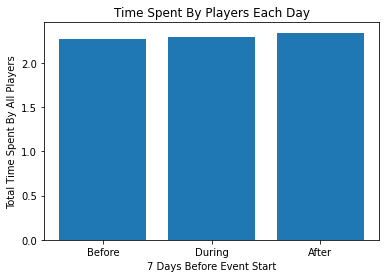

In [ ]:
time = ['Before', 'During', 'After']
plt.bar(time, pc_average)
plt.xlabel("7 Days Before Event Start")
plt.ylabel("Total Time Spent By All Players")
plt.title("Time Spent By Players Each Day")
plt.show()

In [ ]:
types = ['CAR', 'OTHER', 'BIKE', 'HELICOPTER', 'PLANE', 'CYCLE',
       'BOAT', 'JET', 'TANK', 'PROPERTY', 'WEAPON', 'TRUCK']
stuff1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(afterheistdays)):
  dd = get_data_type(afterheistdays[i], types)
  for j in range(len(dd)):
    stuff1[j] += dd[j]
i = 0
w = 0
while i < len(stuff1):
  if stuff1[i] < 750:
    w += stuff1.pop(i)
    types.pop(i)
  else:
    i += 1
stuff1.append(w)
types.append("OTHER")
labels = types
sizes = stuff1
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()